In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.000000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.000000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.000000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.663800,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
5,189129552,10.5,3407.0,182.0,0.000000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct
6,189132829,10.5,1246.0,487.0,0.000000,133.0,11/1/2019 6:29,11/1/2019 6:49,6.84371,79.9051,6.85069,79.8624,266.62,correct
7,189135103,10.5,1333.0,295.0,17.198500,212.0,11/1/2019 6:50,11/1/2019 7:12,6.90760,79.9524,6.90634,79.9042,318.05,correct
8,189139296,10.5,360.0,80.0,4.664000,3.0,11/1/2019 7:00,11/1/2019 7:06,7.26706,80.6064,7.27422,80.6124,100.32,correct
9,189138671,10.5,1539.0,588.0,33.986400,43.0,11/1/2019 7:02,11/1/2019 7:28,6.85137,79.9537,6.84779,79.9274,257.89,correct


### Filling NaN data with mean value of the columns

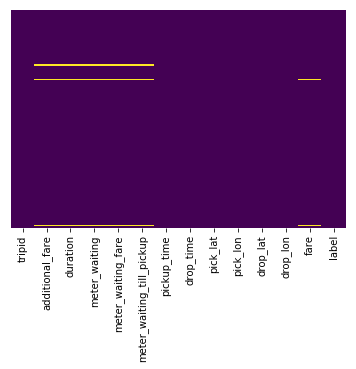

In [3]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

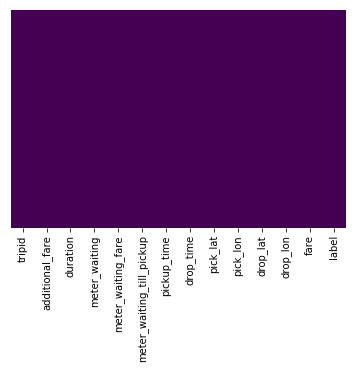

In [4]:
train= train.fillna(train.mean())
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Since label is a word, convert it into binary for computation purposes

In [5]:
le = preprocessing.LabelEncoder()
train['label'] = le.fit_transform(train['label'])
train['label'] = pd.to_numeric(train['label'], errors='ignore')
train['label']= 1-train['label']
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.500000,834.000000,56.000000,0.000000,64.000000,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.500000,791.000000,47.000000,0.000000,134.000000,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.500000,1087.000000,80.000000,0.000000,61.000000,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.500000,598.000000,271.000000,15.663800,68.000000,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,13.719651,1702.858077,629.074231,32.057666,112.466832,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1


### compute the correlation of every feature with label

In [6]:
train.corr()['label']

tripid                       0.062490
additional_fare             -0.039219
duration                    -0.108287
meter_waiting               -0.102833
meter_waiting_fare          -0.099049
meter_waiting_till_pickup   -0.033860
pick_lat                    -0.029237
pick_lon                    -0.037713
drop_lat                    -0.012781
drop_lon                    -0.030347
fare                        -0.176411
label                        1.000000
Name: label, dtype: float64

In [7]:
combine = [train, test]

### Seperate new features from pickup_time & drop_time

In [8]:
#extract year, month, day, hour and minute from datetime typed column
for data in combine:
    data['pickup_time']= pd.to_datetime(data['pickup_time'],format='%m/%d/%Y %H:%M')
    data['drop_time']= pd.to_datetime(data['drop_time'],format='%m/%d/%Y %H:%M')

    data['year']=data['pickup_time'].dt.year 
    data['month']=data['pickup_time'].dt.month 

    data['day']=data['pickup_time'].dt.day
    data['pickup_hour']=data['pickup_time'].dt.hour
    data['pickup_minute']=data['pickup_time'].dt.minute

    data['drop_hour']=data['drop_time'].dt.hour
    data['drop_minute']=data['drop_time'].dt.minute

In [9]:
train.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,...,drop_lon,fare,label,year,month,day,pickup_hour,pickup_minute,drop_hour,drop_minute
0,189123628,10.500000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,...,79.8783,270.32,1,2019,11,1,0,20,0,34
1,189125358,10.500000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,...,79.8923,197.85,1,2019,11,1,0,56,1,9
2,189125719,10.500000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,...,79.9146,301.64,1,2019,11,1,1,8,1,26
3,189127273,10.500000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,...,79.8971,82.30,1,2019,11,1,2,27,2,37
4,189128020,13.719651,1702.858077,629.074231,32.057666,112.466832,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,...,79.9290,358.39,1,2019,11,1,3,34,3,51


### then drop both pickup_time and drop_time column

In [10]:
for data in combine: 
    data.drop(['pickup_time', 'drop_time'], axis = 1,inplace = True)

In [11]:
# train['pickup_time'] = pd.to_datetime(train.pickup_time)
# train['drop_time'] = pd.to_datetime(train.drop_time)


In [12]:
# train['pickup_time']= pd.to_numeric(train['pickup_time'])
# train['drop_time']= pd.to_numeric(train['drop_time'])

In [13]:
# train['additional_fare_band'] = pd.cut(train['duration'], 3)
# train[['additional_fare_band', 'label']].groupby(['additional_fare_band'], as_index=False).mean().sort_values(by='additional_fare_band', ascending=True)

In [14]:
# combine = [train, test]
# for dataset in combine:    
#     dataset.loc[ dataset['duration'] <= 90774, 'duration'] = 0
#     dataset.loc[(dataset['duration'] > 90774.4) & (dataset['duration'] <= 181548.8), 'duration'] = 1
#     dataset.loc[(dataset['duration'] > 181548.8) & (dataset['duration'] <= 272323.2), 'duration'] = 2
#     dataset.loc[(dataset['duration'] > 272323.2) & (dataset['duration'] <= 363097.6), 'duration'] = 3
#     dataset.loc[ dataset['duration'] > 363097.6, 'duration']
# train.head()

In [15]:
#train.drop(['additional_fare_band'], axis = 1, inplace= True)

### Used Normalization to make longitude and latitude between 0-1

In [16]:
# since longitude and latitude are meaningless and has poor correlation to the label, I used normalizing the values
for data in combine:
    data['pick_lat'] = (data['pick_lat'] - data['pick_lat'].min()) / (data['pick_lat'].max() - data['pick_lat'].min())
    data['pick_lon'] = (data['pick_lon'] - data['pick_lon'].min()) / (data['pick_lon'].max() - data['pick_lon'].min())
    data['drop_lat'] = (data['drop_lat'] - data['drop_lat'].min()) / (data['drop_lat'].max() - data['drop_lat'].min())
    data['drop_lon'] = (data['drop_lon'] - data['drop_lon'].min()) / (data['drop_lon'].max() - data['drop_lon'].min())
    #dataset['meter_waiting_till_pickup'] = (dataset['meter_waiting_till_pickup'] - dataset['meter_waiting_till_pickup'].min()) / (dataset['meter_waiting_till_pickup'].max() - dataset['meter_waiting_till_pickup'].min())
    #dataset['pickup_time'] = (dataset['pickup_time'] - dataset['pickup_time'].min()) / (dataset['pickup_time'].max() - dataset['pickup_time'].min())
    #dataset['drop_time'] = (dataset['drop_time'] - dataset['drop_time'].min()) / (dataset['drop_time'].max() - dataset['drop_time'].min())



### creating new feature

In [17]:
for data in combine:
    data['fare']= data['additional_fare'] + data['fare']
    data.drop(['additional_fare'], axis = 1, inplace= True)


### Normalizing remaining features

In [18]:
for data in combine:
    data['fare'] = (data['fare'] - data['fare'].min()) / (data['fare'].max() - data['fare'].min())


### Numerical Bining to reduce overfitting

In [19]:
# data['duration'] = (data['duration'] - data['duration'].min()) / (data['duration'].max() - data['duration'].min())
# data['meter_waiting'] = (data['meter_waiting'] - data['meter_waiting'].min()) / (data['meter_waiting'].max() - data['meter_waiting'].min())
# data['meter_waiting_till_pickup'] = (data['meter_waiting_till_pickup'] - data['meter_waiting_till_pickup'].min()) / (data['meter_waiting_till_pickup'].max() - data['meter_waiting_till_pickup'].min())

In [20]:
for data in combine:
    mwfm = int(data.meter_waiting_fare.max())
    mwtpmm = int(data.meter_waiting_till_pickup.max())

    data['meter_waiting_fare'] = pd.cut(data['meter_waiting_fare'], bins=[-1,int(0.3*mwfm),int(0.5*mwfm),int(0.7*mwfm),mwfm], labels=[float(1.0), float(2.0), float(3.0), float(4.0)])
    data['meter_waiting_till_pickup'] = pd.cut(data['meter_waiting_till_pickup'], bins=[-1,int(0.3*mwtpmm),int(0.5*mwtpmm),int(0.7*mwtpmm),mwtpmm], labels=[float(1.0), float(2.0), float(3.0), float(4.0)])
    cat_columns = data.select_dtypes(['category']).columns
    data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)


In [21]:
train.meter_waiting_fare.max()

3

In [24]:
train['meter_waiting_fare'].value_counts()

 0    17166
 1        5
 3        4
-1        1
Name: meter_waiting_fare, dtype: int64

In [23]:
train

,tripid,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_minute,drop_hour,drop_minute
0,189123628,834.000000,56.000000,0,0,0.437643,0.067367,0.022788,0.968310,0.007411,1,2019,11,1,0,20,0,34
1,189125358,791.000000,47.000000,0,0,0.448701,0.066611,0.023035,0.968702,0.005498,1,2019,11,1,0,56,1,9
2,189125719,1087.000000,80.000000,0,0,0.459348,0.038639,0.023580,0.969327,0.008237,1,2019,11,1,1,8,1,26
3,189127273,598.000000,271.000000,0,0,0.467538,0.059135,0.023361,0.968836,0.002449,1,2019,11,1,2,27,2,37
4,189128020,1702.858077,629.074231,0,0,0.443269,0.035615,0.021401,0.969730,0.009820,1,2019,11,1,3,34,3,51
5,189129552,3407.000000,182.000000,0,0,0.566109,0.065351,0.023152,0.967935,0.028383,1,2019,11,1,5,38,6,35
6,189132829,1246.000000,487.000000,0,0,0.428743,0.072239,0.021541,0.967865,0.007313,1,2019,11,1,6,29,6,49
7,189135103,1333.000000,295.000000,0,0,0.458974,0.111970,0.022860,0.969035,0.008671,1,2019,11,1,6,50,7,12
8,189139296,360.000000,80.000000,0,0,0.629059,0.661319,0.031580,0.988872,0.002925,1,2019,11,1,7,0,7,6
9,189138671,1539.000000,588.000000,0,0,0.432368,0.113062,0.021473,0.969685,0.007083,1,2019,11,1,7,2,7,28


In [25]:
#train['meter_waiting_fare']+train['meter_waiting_till_pickup']
train.dtypes

tripid                         int64
duration                     float64
meter_waiting                float64
meter_waiting_fare              int8
meter_waiting_till_pickup       int8
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                          int32
year                           int64
month                          int64
day                            int64
pickup_hour                    int64
pickup_minute                  int64
drop_hour                      int64
drop_minute                    int64
dtype: object

### test data

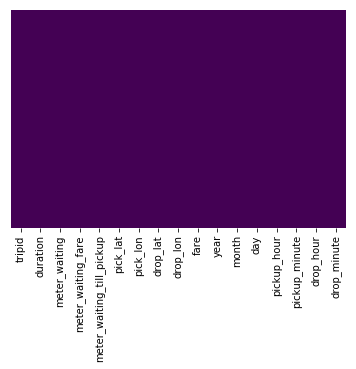

In [26]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
# test['pickup_time'] = pd.to_datetime(test.pickup_time)
# test['drop_time'] = pd.to_datetime(test.drop_time)

In [28]:
# test['pickup_time']=pd.to_numeric(test['pickup_time'])
# test['drop_time']=pd.to_numeric(test['drop_time'])

### selecting X , Y

In [29]:
X_train = train.drop(['label','tripid'],axis=1)
Y_train = train['label']
X_test= test.drop(['tripid'],axis=1)


### Xgboost model building

In [30]:
import xgboost as xgb
# model=xgb.XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.01,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='binary:logistic', 
#                       n_estimators=100, 
#                       reg_alpha = 0.3,
#                       min_child_weight=1,
#                       max_delta_step = 0,
#                       max_depth=4, 
#                       gamma=1)

model=xgb.XGBClassifier()
model.fit(X_train, Y_train)
#model.score(x_test,y_test)


C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [31]:
y_pred = model.predict(X_test)


In [32]:
prediction_output = pd.DataFrame(test['tripid']) 

In [33]:
prediction_output['prediction']= y_pred

In [34]:
prediction_output.to_csv('xgboost_method.csv', encoding='utf-8', index=False)

### Ensembling Techniques

In [35]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


In [36]:
bg = BaggingClassifier(XGBClassifier,max_samples = 0.5, max_features = 1.0, n_estimators=20)
bg.fit(X_train, Y_train)

TypeError: Cannot clone object '<class 'xgboost.sklearn.XGBClassifier'>' (type <class 'type'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
y_pred_2 = bg.predict(X_test)
prediction_output_2 = pd.DataFrame(test['tripid']) 
prediction_output_2['prediction']= y_pred_2
prediction_output_2.to_csv('bg.csv', encoding='utf-8', index=False)